In [2]:
n=int(input("enter no of docs : "))
s=[]
for i in range(n):
    l=open(input("enter path : ")).read()
    s.append(l)
print(s)

enter no of docs : 4
enter path : s1.txt
enter path : s2.txt
enter path : s3.txt
enter path : s4.txt
['new home sales tap forecasts new july tap', 'home sales rise in july increase rise july home', 'increase in home sales july home in increase july sales', 'july new home sales rise increase home july tap']


In [3]:
#removing punctuations
punc="()-[]{}_!@#$%^&*<>.,;:"
for i in range(n):
    for word in s[i]:
        if word in punc:
            s[i]=s[i].replace(word," ")
            s[i]=s[i].replace("\n"," ")
            s[i]=s[i].lower()
print(s)

['new home sales tap forecasts new july tap', 'home sales rise in july increase rise july home', 'increase in home sales july home in increase july sales', 'july new home sales rise increase home july tap']


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\LAKSHMI
[nltk_data]     NARSITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\LAKSHMI
[nltk_data]     NARSITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
token=[]
for i in s:
    tk=word_tokenize(i)
    token.append(tk)
    
res=[]
for i in token:
    for word in i:
        if word not in stopwords.words("english") and word not in res:
            res.append(word)
res.sort()          
for k in range(len(s)):
    s[k]=s[k].split(" ")
print(s)

[['new', 'home', 'sales', 'tap', 'forecasts', 'new', 'july', 'tap'], ['home', 'sales', 'rise', 'in', 'july', 'increase', 'rise', 'july', 'home'], ['increase', 'in', 'home', 'sales', 'july', 'home', 'in', 'increase', 'july', 'sales'], ['july', 'new', 'home', 'sales', 'rise', 'increase', 'home', 'july', 'tap']]


In [6]:
dictx1={}
for word in res:
    dictx1[word]=[]
for word in res:
  for i in range(len(s)):
    for j in range(len(s[i])):
      if word==s[i][j]:
        dictx1[word].append(i+1)
        break
dictx1

{'forecasts': [1],
 'home': [1, 2, 3, 4],
 'increase': [2, 3, 4],
 'july': [1, 2, 3, 4],
 'new': [1, 4],
 'rise': [2, 4],
 'sales': [1, 2, 3, 4],
 'tap': [1, 4]}

In [7]:
def intersectlists(l1,l2):
    res=[]
    for i in l1:
        if i in l2:
            res.append(i)
    return res
def unionlists(l1,l2):
    res=[]
    for i in l1:
        if(i not in res):
            res.append(i)
    for i in l2:
        if(i not in res):
            res.append(i)
    return res
def notop(l1):
    res=[]
    for i in range(1,len(s)+1):
        if(i not in l1):
            res.append(i)
    return res
def findposting(q1):
    l1=[]
    for i in dictx1:
        if i==q1:
            l1=dictx1[q1]
    return l1

def precedence(l1):
    if l1=="not":
        return 1
    elif l1=="and":
        return 2
    elif l1=="or":
        return 3

In [14]:
#boolean queries
query=input()
query=query.split()
stack=[]
words=[]
idx=-1
oper=["and","or","not"]
for i in range(len(query)):
    if(query[i] not in oper):
        words.append(findposting(query[i]))
    else:
        pre=precedence(query[i])
        now=query[i]
        if(stack==[]):
            stack.append(query[i])
            idx=idx+1
        elif(precedence(stack[idx])>pre):
            stack.append(query[i])
            idx=idx+1
        elif(precedence(stack[idx])<=pre):
            while(stack!=[] and precedence(stack[idx])<pre):
                if(stack[idx]=="and"):
                    l1=words.pop()
                    l2=words.pop()
                    words.append(intersectlists(l1,l2))
                elif(stack[idx]=="or"):
                    l1=words.pop()
                    l2=words.pop()
                    words.append(unionlists(l1,l2))
                elif(stack[idx]=="not"):
                    l1=words.pop()
                    words.append(notop(l1))
                stack.pop()
                idx=idx-1
            stack.append(now)
            idx=idx+1
if(stack!=[]):
    while(stack!=[]):
        if(stack[idx]=="and"):
            l1=words.pop()
            l2=words.pop()
            words.append(intersectlists(l1,l2))
        elif(stack[idx]=="or"):
            l1=words.pop()
            l2=words.pop()
            words.append(unionlists(l1,l2))
        elif(stack[idx]=="not"):
            l1=words.pop()
            words.append(notop(l1))
        stack.pop()
        idx=idx-1
    stack.append(now)
    idx=idx+1
print(sorted(words[0]))

new and tap
[1, 4]


In [27]:
#phrase queries
d={}
for word in res:
    d[word]=[]
for word in res:
    for i in range(len(s)):
        re={}
        l=[]
        for j in range(len(s[i])):
            if word==s[i][j]:
                l.append(i+1)
        re[i+1]=l
        if(l!=[]):
            d[word].append(re)
d


p=input()
q=["and","or","not"]
for i in p.split(" "):
    if i in q:
        sam=i
        p=p.replace(i,"\n")
p=p.split("\n")
print(p)

l1=[]
for i in p:
    i=i.split()
    for j in i:
        l2=[]
        for k in d[j]:
            l2.append(int(" ".join(str(key) for key in k.keys())))
        l1.append(l2)
if(sam=="and"):
    print(set(intersectlists(l1[0],l1[1])))
elif(sam=="or"):
    print(set(unionlists(l1[0],l1[1])))

rise new or tap
['rise new ', ' tap']
{1, 2, 4}


In [40]:
#wildcard
s1="rama raja ravi sky skill skip raghava"
sp1=s1.split()
g=input()
g=g[:len(g)-1]

s1="$"+s1+"$"
t=s1.replace(" ","$")
l=[]
for i in range(len(t)-1):
    p=t[i]+t[i+1]
    l.append(p)

k={}
for i in l:
    m=[]
    if "$" in i:
        if(i[0]=="$"):
            for j in sp1:
                if(i[1] in j):
                    m.append(j)
            k[i]=m
        else:
            for j in sp1:
                if(l[0] in j):
                    m.append(j)
            k[i]=m
    else:
        for j in sp1:
            for i in j:
                m.append(j)
        k[i]=m
        
l=[]
for i in k.keys():
    if "$" in i:
        if(i[0]=="$"):
            t=i[1]
        else:
            t=i[0]
    else:
        t=i
    if(t==g):
        if(k[i] not in l):
            l.append(k[i])
print(l[0])

sk
['sky', 'skill', 'skip']


In [80]:
#spell correction
def min1(a,b,c):
  if(a<b and a<c):
    return a
  elif(b<c):
    return b
  else:
    return c

def edit_distance(s1,ma,o):
  for i in range(len(ma)):
    s1=s1.lower()
    s2=ma[i]
    s2=s2.lower()
    n=len(s1)
    t=len(s2)
    p=[]
    m=[]
    for i in range(1):
      for j in range(1):
        for k in range(t+1):
          m.extend([i+k])
    p.append(m)
    for i in range(1,n+1):
      for j in range(1):
        l=[]
        for k in range(1):
          l.extend([i+k])
        for k in range(1,t+1):
          l.append(0)
        p.append(l)
    #print(p)
    a=list(s1)
    b=list(s2)
    #print(a)
    #print(b)
    for i in range(len(a)):
      for j in range(len(b)):
        if(a[i]==b[j]):
            p[i+1][j+1]=min1(p[i+1][j]+1,p[i][j+1]+1,p[i][j]+0)
        else:
          p[i+1][j+1]=min1(p[i+1][j]+1,p[i][j+1]+1,p[i][j]+1)
    mn=p[-1][-1]
    o.extend([mn])
  low=min(o)
  low1=o.index(low)
  print(ma[low1])
s1=input("enter string1 : ")
ma = ["paris","book","hello"]
o=[]
edit_distance(s1,ma,o)

enter string1 : haelo
hello


In [77]:
#bsbi
def indexing_block(l1,ind):
    s=[]
    for i in range(len(l1)):
        l=open(l1[i]).read()
        s.append(l)
    punc="()-[]{}_!@#$%^&*<>.,;:"
    for i in range(len(s)):
        for word in s[i]:
            if word in punc:
                s[i]=s[i].replace(word," ")
                s[i]=s[i].replace("\n"," ")
                s[i]=s[i].lower()
    
    token=[]
    for i in s:
        tk=word_tokenize(i)
        token.append(tk)

    res=[]
    for i in token:
        for word in i:
            if word not in stopwords.words("english") and word not in res:
                res.append(word)
    res.sort()          
    for k in range(len(s)):
        s[k]=s[k].split(" ")
        
        
    dictx1={} 
    for word in res:
        if(word not in dictx1.keys()):
            dictx1[word]=[]
    for word in res:
      for i in range(len(s)):
        for j in range(len(s[i])):
          if word==s[i][j]:
            dictx1[word].append(i+1+ind)
            break
    return dictx1

m1=["s1.txt","s2.txt"]
m2=["s3.txt","s4.txt"]
dictx1={}
l=[]
l.append(indexing_block(m1,0))
l.append(indexing_block(m2,2))
print(l)
res_key=[]
for i in l:
    res_key.extend(i.keys())
res_key.sort()
res_keys=[]
[res_keys.append(x) for x in res_key if x not in res_keys]
res_dict={}
for i in res_keys:
    result=[]
    for dix in l:
        if i in dix.keys():
            result.extend(dix[i])
        res_dict=result
print(res_dict)

[{'forecasts': [1], 'home': [1, 2], 'increase': [2], 'july': [1, 2], 'new': [1], 'rise': [2], 'sales': [1, 2], 'tap': [1]}, {'home': [3, 4], 'increase': [3, 4], 'july': [3, 4], 'new': [4], 'rise': [4], 'sales': [3, 4], 'tap': [4]}]
[1, 4]


In [71]:
#spimi
def indexing_block(dictx1,l1,ind):
    s=[]
    for i in range(len(l1)):
        l=open(l1[i]).read()
        s.append(l)
    punc="()-[]{}_!@#$%^&*<>.,;:"
    for i in range(len(s)):
        for word in s[i]:
            if word in punc:
                s[i]=s[i].replace(word," ")
                s[i]=s[i].replace("\n"," ")
                s[i]=s[i].lower()
    
    token=[]
    for i in s:
        tk=word_tokenize(i)
        token.append(tk)

    res=[]
    for i in token:
        for word in i:
            if word not in stopwords.words("english") and word not in res:
                res.append(word)
    res.sort()          
    for k in range(len(s)):
        s[k]=s[k].split(" ")
    
    for word in res:
        if(word not in dictx1.keys()):
            dictx1[word]=[]
    for word in res:
      for i in range(len(s)):
        for j in range(len(s[i])):
          if word==s[i][j]:
            dictx1[word].append(i+1+ind)
            break
    return dictx1

m1=["s1.txt","s2.txt"]
m2=["s3.txt","s4.txt"]
dictx1={}
l=[]
l.append(indexing_block(dictx1,m1,0))
l.append(indexing_block(dictx1,m2,2))
print(l[len(l)-1])

{'forecasts': [1], 'home': [1, 2, 3, 4], 'increase': [2, 3, 4], 'july': [1, 2, 3, 4], 'new': [1, 4], 'rise': [2, 4], 'sales': [1, 2, 3, 4], 'tap': [1, 4]}


In [50]:
import numpy as np
import math
l=["s1.txt",'s2.txt']
s=[]
for i in range(2):
  f=open(l[i],encoding="UTF-8")
  read=f.read()
  s.append(read)
  f.seek(0)
#counting number of lines
line=1
for i in s:
  for word in i:
    if word=='\n':
      line+=1
#removing punctuations and new lines
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
for i in range(len(s)):
  for word in s[i]:
    if word in punc:
      s[i]=s[i].replace(word," ")
      s[i]=s[i].replace('\n'," ")
      s[i]=s[i].lower()
for k in range(len(s)):
  s[k]=s[k].split()
print(s)

vocab=[]
for i in s:
    vocab.extend(i)
vocab=set(vocab)
print(vocab)

mat={}
for i in range(len(s)):
    res=[]
    for word in vocab:
        tf=s[i].count(word)
        df=0
        for k in s:
            if word in k:
                df=df+1
        idf=math.log(2/df)
        res.append(tf*idf)
    mat[i]=res
print(mat)
query=input()
queryvec=[]
query=query.split(" ")
querysum=0
for i in vocab:
  if i in query:
    queryvec.append(1)
    querysum+=1
  else:
    queryvec.append(0)
    querysum+=0
querymag=math.sqrt(querysum)
cosine=[]
for key in mat.keys():
  temp=np.dot(queryvec,mat[key])
  sum=0
  for i in mat[key]:
    sum+=(i**2)
  mag=math.sqrt(sum)
  cosine.append(temp/(mag*querymag))
print(cosine)

[['new', 'home', 'sales', 'tap', 'forecasts', 'new', 'july', 'tap'], ['home', 'sales', 'rise', 'in', 'july', 'increase', 'rise', 'july', 'home']]
{'rise', 'tap', 'in', 'sales', 'july', 'new', 'increase', 'forecasts', 'home'}
{0: [0.0, 1.3862943611198906, 0.0, 0.0, 0.0, 1.3862943611198906, 0.0, 0.6931471805599453, 0.0], 1: [1.3862943611198906, 0.0, 0.6931471805599453, 0.0, 0.0, 0.0, 0.6931471805599453, 0.0, 0.0]}
new home
[0.4714045207910317, 0.0]


In [45]:
#naive bayes
cdoc=["test1.txt","test2.txt","text3.txt"]
cbardoc=["test4.txt"]
f=open("test5.txt")
totaldocs=len(cdoc)+len(cbardoc)
read=f.read()
query=str(read)

c=[]
for i in cdoc:
    f=open(i)
    read=f.read()
    c.extend(read.split())
    
cbar=[]
for i in cbardoc:
    f=open(i)
    read=f.read()
    cbar.extend(read.split())
vocab=c+cbar
vocab=set(vocab)
pyes=1
pno=1
query=query.split(" ")
for i in query:
    pyes*=(c.count(i)+1)/(len(c)+len(vocab))
for i in query:
    pno*=(cbar.count(i)+1)/(len(cbar)+len(vocab))

pyes=(len(cdoc)/totaldocs)*pyes
pno=(len(cbardoc)/totaldocs)*pno
print(pyes)
print(pno)
if(pyes>pno):
    print("yes")
else:
    print("no")

0.00030121377997263036
0.00013548070246744226
yes


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cat1


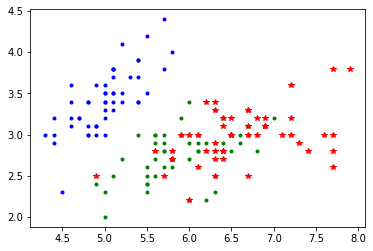

In [38]:
#k-nn
from sklearn import datasets
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
iris=datasets.load_iris()
iris
q=[2.3,3.4]
k=15
x=iris.data[:,:2]
y=iris.target
def distance(x,q):
    a=[]
    for i in range(len(x)):
        a1=(x[i][0]-q[0])**2
        a2=(x[i][1]-q[1])**2
        a.append(math.sqrt(a1+a2))
    return a
c=distance(x,q)
idx=np.argsort(c)
t=y[idx][:k]
t=list(t)
print(t)
zero=t.count(0)
one=t.count(1)
two=t.count(2)
if(zero>one and zero>two):
    m="cat1"
elif(one>two):
    m="cat2"
else:
    m="cat3"
print(m)

col=["sepal_length","sepal_width","petal_length","petal_width"]
df=pd.DataFrame(iris.data,columns=col)
plt.plot(df["sepal_length"][:50],df["sepal_width"][:50],"b.")
plt.plot(df["sepal_length"][50:100],df["sepal_width"][50:100],"g.")
plt.plot(df["sepal_length"][100:],df["sepal_width"][100:],"r*")
plt.show()

In [30]:
#k-means
def mean(s):
    return sum(s)/len(s)
l=[1,2,3,11,51,69,7,8,9,10]
n=int(input("enter no of clusters : "))
clusters={}
for i in range(n):
    clusters[i+1]=[[],l[i]]

while True:
    present={}
    for cluster in clusters:
        present[cluster]=[]
    for doc in l:
        m=1000
        c=" "
        for cluster in clusters:
            if(m>abs(doc-clusters[cluster][-1])):
                m=abs(doc-clusters[cluster][-1])
                c=cluster
        present[c].append(doc)
    if(present[c]==clusters[c][0]):
        break
    else:
        for cluster in clusters:
            clusters[cluster][0]=present[cluster]
            clusters[cluster][1]=mean(present[cluster])
for cluster in clusters:
    print(cluster," : ",clusters[cluster][0])

enter no of clusters : 6
1  :  [1]
2  :  [2]
3  :  [3, 7]
4  :  [11, 8, 9, 10]
5  :  [51]
6  :  [69]
